In [1]:
!pip install seaborn
!pip install seaborn scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = tf.image.resize(x_train, (75, 75))
x_test = tf.image.resize(x_test, (75, 75))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Define InceptionV3 model
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
inception_base.trainable = False
model_inception = models.Sequential([
    inception_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train InceptionV3
history_inception = model_inception.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 351s 365ms/step - accuracy: 0.7629 - loss: 0.7130 - val_accuracy: 0.9186 - val_loss: 0.2567
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 393s 419ms/step - accuracy: 0.8995 - loss: 0.3061 - val_accuracy: 0.9306 - val_loss: 0.2141
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 452s 481ms/step - accuracy: 0.9123 - loss: 0.2651 - val_accuracy: 0.9352 - val_loss: 0.1961
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 443s 472ms/step - accuracy: 0.9212 - loss: 0.2339 - val_accuracy: 0.9392 - val_loss: 0.1855
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 446s 476ms/step - accuracy: 0.9272 - loss: 0.2212 - val_accuracy: 0.9412 - val_loss: 0.1832
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 445s 474ms/step - accuracy: 0.9307 - loss: 0.2070 - val_accuracy: 0.9381 - val_loss: 0.1851
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 890s 949ms/step - accuracy: 0.9341 - loss: 0.1978 - val_accuracy: 0.9402 - val_loss: 0.1758
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 641s 683ms/step - accuracy: 0.9392 -

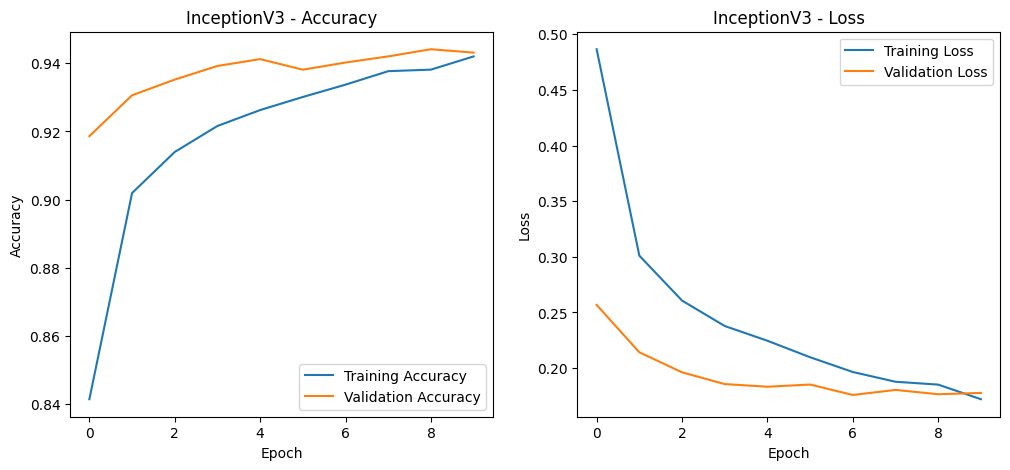

In [7]:
# Plot accuracy and loss
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history_inception, "InceptionV3")

In [8]:
# Evaluate on test data
test_loss, test_accuracy = model_inception.evaluate(x_test, y_test)
print(f"InceptionV3 Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 225ms/step - accuracy: 0.9393 - loss: 0.1943
InceptionV3 Test Accuracy: 94.31%


313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 242ms/step
Classification Report for InceptionV3:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.91      0.93      1032
           3       0.91      0.91      0.91      1010
           4       0.96      0.95      0.95       982
           5       0.87      0.90      0.89       892
           6       0.96      0.95      0.95       958
           7       0.92      0.96      0.94      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.93      0.94      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



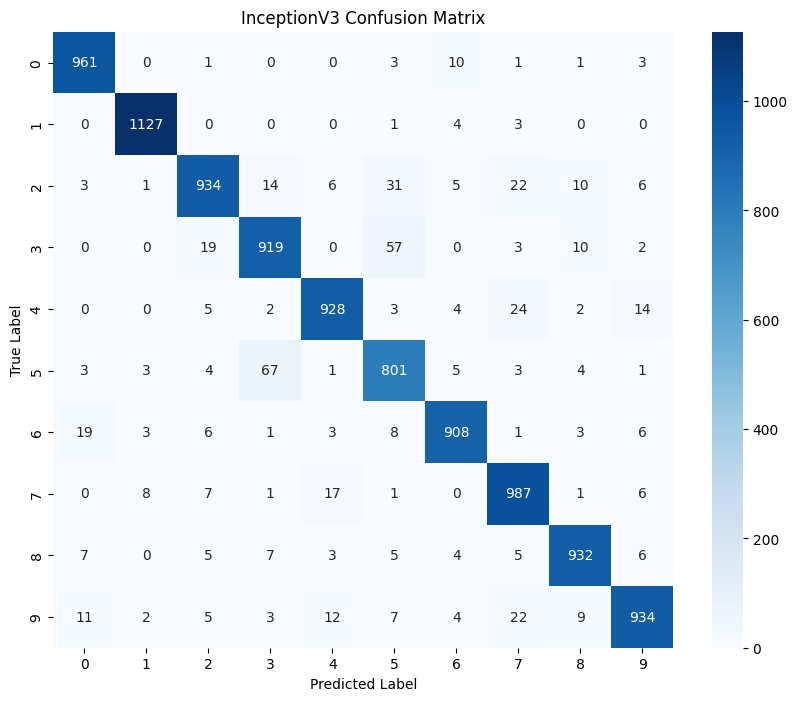

In [9]:
# Predictions and classification report
y_pred_inception = model_inception.predict(x_test)
y_pred_classes = np.argmax(y_pred_inception, axis=1)
y_true = np.argmax(y_test, axis=1)
print("Classification Report for InceptionV3:")
print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("InceptionV3 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

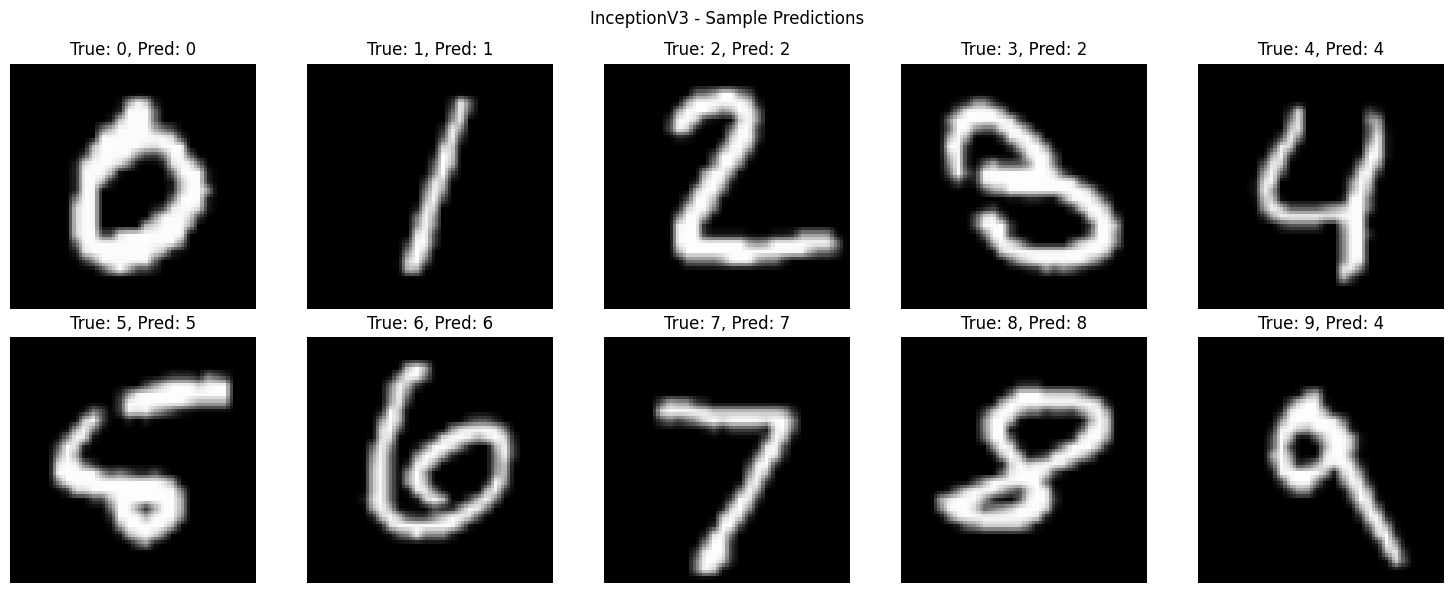

In [10]:
# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('InceptionV3 - Sample Predictions')
for i, ax in enumerate(axes.flat):
    idx = np.where(y_true == i)[0][0]
    ax.imshow(x_test[idx], cmap='gray')
    ax.set_title(f"True: {i}, Pred: {y_pred_classes[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()